<a href="https://colab.research.google.com/github/ihyaulumuddin044/ML_Portofolio/blob/main/imeges_classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import tensorflow as tf
import keras
from keras._tf_keras.keras.preprocessing.image import ImageDataGenerator
import warnings


In [6]:
train_dataGen1 = ImageDataGenerator(rescale=1./255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip= True)


In [7]:
# !unzip '/content/data/dogs_and_cats.zip' -d '/content/data'

In [8]:
training_set1 = train_dataGen1.flow_from_directory('/content/data/train',
                                                 target_size=(64,64),
                                                 batch_size=32,
                                                 class_mode='binary')

Found 555 images belonging to 2 classes.


In [9]:
test_datagen1 = ImageDataGenerator(rescale=1./255)

In [10]:
test_set1 = test_datagen1.flow_from_directory('/content/data/test',
                                            target_size=(64,64),
                                            batch_size=32,
                                            class_mode='binary')

Found 138 images belonging to 2 classes.


#modeling

In [11]:
cnn1 = tf.keras.models.Sequential()

In [12]:
cnn1.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64,64,3]))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
cnn1.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [14]:
cnn1.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn1.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [15]:
cnn1.add(tf.keras.layers.Flatten())

In [16]:
cnn1.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [17]:
cnn1.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [18]:
cnn1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
cnn1.fit(x=training_set1, validation_data= test_set1, epochs=20)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 401ms/step - accuracy: 0.4940 - loss: 0.7905 - val_accuracy: 0.5000 - val_loss: 0.6945
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 212ms/step - accuracy: 0.4951 - loss: 0.6870 - val_accuracy: 0.5435 - val_loss: 0.6925
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 207ms/step - accuracy: 0.5771 - loss: 0.6773 - val_accuracy: 0.5580 - val_loss: 0.6895
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 252ms/step - accuracy: 0.6454 - loss: 0.6416 - val_accuracy: 0.5507 - val_loss: 0.6943
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 228ms/step - accuracy: 0.6549 - loss: 0.6408 - val_accuracy: 0.5797 - val_loss: 0.6737
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 224ms/step - accuracy: 0.6904 - loss: 0.6086 - val_accuracy: 0.6449 - val_loss: 0.6637
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 264ms/step - accuracy: 0.7095 - loss: 0.5861 - val_accuracy: 0.6884 - val_loss: 0.6393
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 223ms/step - accuracy: 0.7111 - loss: 0.5906 - val_accuracy: 0

In [20]:
import numpy as np
from keras.preprocessing import image

In [21]:
test_image = image.load_img('/content/data/test/cat_s/cat_587.jpg', target_size=(64,64))

In [22]:
test_image = image.img_to_array(test_image)

In [23]:
test_image = np.expand_dims(test_image, axis= 0)

In [24]:
result1 = cnn1.predict(test_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


In [25]:
training_set1.class_indices
if result1[0][0] == 1:
  prediction = "Prediksi: Anjing 🐶"
else:
  prediction = "Prediksi: Kucing 🐱"

In [26]:
print(prediction)

Prediksi: Anjing 🐶


In [27]:
from sklearn.metrics import confusion_matrix, classification_report

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 148ms/step
Confusion Matrix
[[40 29]
 [35 34]]


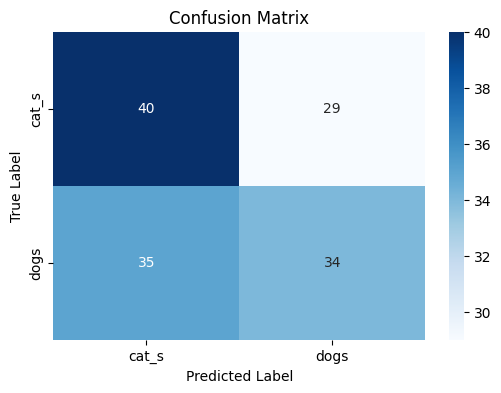


Classification Report
              precision    recall  f1-score   support

        cats       0.53      0.58      0.56        69
        dogs       0.54      0.49      0.52        69

    accuracy                           0.54       138
   macro avg       0.54      0.54      0.54       138
weighted avg       0.54      0.54      0.54       138



In [28]:
import tensorflow as tf
# from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Reset test generator agar urutan data konsisten
test_set1.reset()

# Prediksi menggunakan model
Y_pred = cnn1.predict(test_set1, steps=len(test_set1), verbose=1)

# Konversi probabilitas ke label 0 atau 1 (karena class_mode='binary')
y_pred = (Y_pred > 0.5).astype(int).reshape(-1)

# Ambil label aktual
y_true = test_set1.classes

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix")
print(cm)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=test_set1.class_indices.keys(),
            yticklabels=test_set1.class_indices.keys())
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("\nClassification Report")
target_names = list(training_set1.class_indices.keys())
print(classification_report(y_true, y_pred, target_names=target_names))


Found 445 images belonging to 2 classes.
Found 110 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.7358 - loss: 0.5138 - val_accuracy: 0.8545 - val_loss: 0.3168 - learning_rate: 0.0010
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 369ms/step - accuracy: 0.9020 - loss: 0.2028 - val_accuracy: 0.8818 - val_loss: 0.2546 - learning_rate: 0.0010
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 441ms/step - accuracy: 0.9386 - loss: 0.1418 - val_accuracy: 0.9000 - val_loss: 0.2418 - learning_rate: 0.0010
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 357ms/step - accuracy: 0.9780 - loss: 0.0800 - val_accuracy: 0.9091 - val_loss: 0.2261 - learning_rate: 0.0010
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 352ms/step - accuracy: 0.9631 - loss: 0.1169 - val_accuracy: 0.9182 - val_loss: 0.2833 - learning_rate: 0.0010
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 411ms/step - accuracy: 0.9805 - loss: 0.0640 - val_accuracy: 0.9000 - val_loss: 0.2578 - learning_rate: 0.0010
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step - accuracy: 0.9737 - loss: 0.0843
Epoc

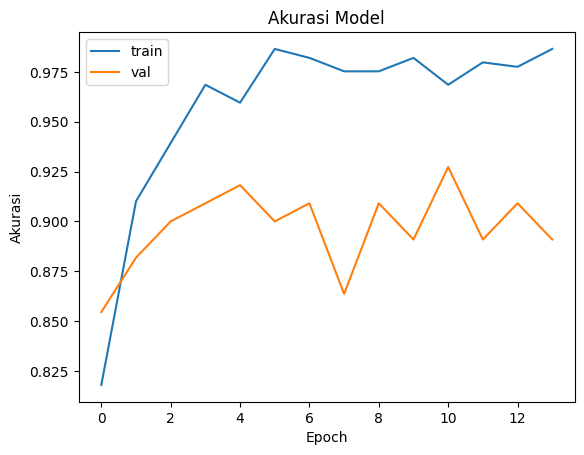

In [30]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

# Data Augmentasi
train_datagen = ImageDataGenerator(
     rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    validation_split=0.2
)

train_set = train_datagen.flow_from_directory(
    '/content/data/train',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_set = train_datagen.flow_from_directory(
    '/content/data/train',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

# Model Transfer Learning
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
base_model.trainable = False  # freeze base model

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(64, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks
early = EarlyStopping(patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(patience=3, factor=0.5, verbose=1)

# Training
history = model.fit(
    train_set,
    validation_data=val_set,
    epochs=20,
    callbacks=[early, reduce_lr]
)

# Plot Akurasi
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.legend()
plt.title("Akurasi Model")
plt.xlabel("Epoch")
plt.ylabel("Akurasi")
plt.show()


3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step


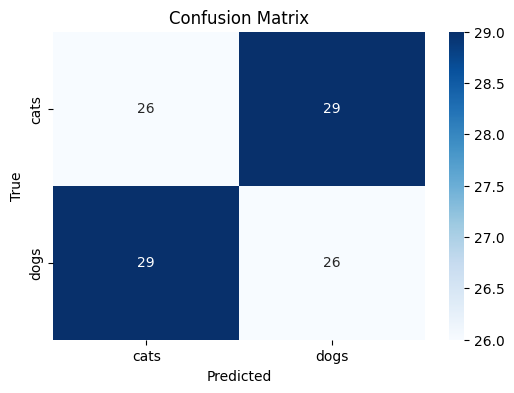

Classification Report
              precision    recall  f1-score   support

        cats       0.47      0.47      0.47        55
        dogs       0.47      0.47      0.47        55

    accuracy                           0.47       110
   macro avg       0.47      0.47      0.47       110
weighted avg       0.47      0.47      0.47       110



In [31]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predict semua data validasi
val_set.reset()  # penting agar urutan data sesuai
Y_pred = model.predict(val_set, verbose=1)
y_pred = (Y_pred > 0.5).astype(int).reshape(-1)

# Ground truth
y_true = val_set.classes

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
labels = list(val_set.class_indices.keys())

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("Classification Report")
print(classification_report(y_true, y_pred, target_names=labels))


Found 138 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 801ms/step


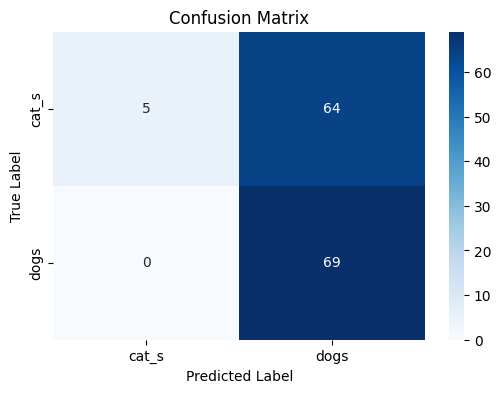

Classification Report
              precision    recall  f1-score   support

       cat_s       1.00      0.07      0.14        69
        dogs       0.52      1.00      0.68        69

    accuracy                           0.54       138
   macro avg       0.76      0.54      0.41       138
weighted avg       0.76      0.54      0.41       138



In [32]:
# Buat ImageDataGenerator untuk test set
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    '/content/data/test',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    shuffle=False  # sangat penting agar urutan label cocok
)

# Prediksi
Y_pred = model.predict(test_generator)
y_pred = (Y_pred > 0.5).astype(int).reshape(-1)

# Ground truth label
y_true = test_generator.classes

# Label nama kelas
labels = list(test_generator.class_indices.keys())

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("Classification Report")
print(classification_report(y_true, y_pred, target_names=labels))

Found 555 images belonging to 2 classes.
Found 138 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 370ms/step - accuracy: 0.5116 - loss: 0.7150 - val_accuracy: 0.5942 - val_loss: 0.6853 - learning_rate: 0.0010
Epoch 2/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 288ms/step - accuracy: 0.6190 - loss: 0.6698 - val_accuracy: 0.6087 - val_loss: 0.6782 - learning_rate: 0.0010
Epoch 3/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 233ms/step - accuracy: 0.6763 - loss: 0.6350 - val_accuracy: 0.6159 - val_loss: 0.6850 - learning_rate: 0.0010
Epoch 4/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 225ms/step - accuracy: 0.6544 - loss: 0.6147 - val_accuracy: 0.5870 - val_loss: 0.6752 - learning_rate: 0.0010
Epoch 5/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 267ms/step - accuracy: 0.6543 - loss: 0.6037 - val_accuracy: 0.7029 - val_loss: 0.6439 - learning_rate: 0.0010
Epoch 6/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 228ms/step - accuracy: 0.6568 - loss: 0.6270 - val_accuracy: 0.6232 - val_loss: 0.6563 - learning_rate: 0.0010
Epoch 7/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 231ms/step - accuracy: 0.6774 - loss: 0.6023 -

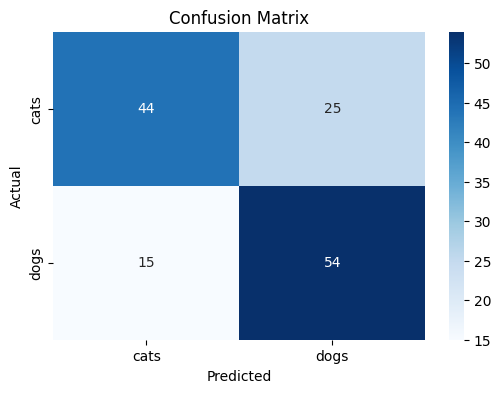

Classification Report:
              precision    recall  f1-score   support

        cats       0.75      0.64      0.69        69
        dogs       0.68      0.78      0.73        69

    accuracy                           0.71       138
   macro avg       0.71      0.71      0.71       138
weighted avg       0.71      0.71      0.71       138



In [34]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Preprocessing: Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=20,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_set = train_datagen.flow_from_directory(
    '/content/data/train',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

test_set = test_datagen.flow_from_directory(
    '/content/data/test',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# 2. Build the Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 3. Train the Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1)

history = model.fit(
    train_set,
    epochs=30,
    validation_data=test_set,
    callbacks=[early, reduce_lr]
)

# 4. Predict & Evaluate
Y_pred = model.predict(test_set)
y_pred = (Y_pred > 0.5).astype(int).reshape(-1)

print("Confusion Matrix:")
cm = confusion_matrix(test_set.classes, y_pred)
print(cm)

# Visual confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['cats', 'dogs'], yticklabels=['cats', 'dogs'], cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("Classification Report:")
print(classification_report(test_set.classes, y_pred, target_names=['cats', 'dogs']))


# pendekatan baru

In [35]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

# Setup paths to your data
train_dir = '/content/data/train'
test_dir = '/content/data/test'

# Image size for MobileNetV2 input (224x224)
img_size = 224

# Preprocessing the images with MobileNetV2 preprocessor
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow data from directory
train_set = train_datagen.flow_from_directory(train_dir,
                                              target_size=(img_size, img_size),
                                              batch_size=32,
                                              class_mode='binary')

test_set = test_datagen.flow_from_directory(test_dir,
                                            target_size=(img_size, img_size),
                                            batch_size=32,
                                            class_mode='binary')


Found 555 images belonging to 2 classes.
Found 138 images belonging to 2 classes.


In [36]:
# Load the pre-trained MobileNetV2 model without the top classification layer
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))

# Freeze the base model layers
base_model.trainable = False

# Build the model on top of MobileNetV2 base
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # For binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [37]:
# Train the model
history = model.fit(
    train_set,
    steps_per_epoch=train_set.samples // train_set.batch_size,
    epochs=30,
    validation_data=test_set,
    validation_steps=test_set.samples // test_set.batch_size
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 27s 980ms/step - accuracy: 0.6964 - loss: 0.5471 - val_accuracy: 0.9141 - val_loss: 0.2231
Epoch 2/30
 1/17 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9375 - loss: 0.1853

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.9375 - loss: 0.1853 - val_accuracy: 0.9062 - val_loss: 0.2300
Epoch 3/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 620ms/step - accuracy: 0.9265 - loss: 0.2046 - val_accuracy: 0.9375 - val_loss: 0.1635
Epoch 4/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.9375 - loss: 0.1402 - val_accuracy: 0.9219 - val_loss: 0.1743
Epoch 5/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 21s 651ms/step - accuracy: 0.9546 - loss: 0.1180 - val_accuracy: 0.9141 - val_loss: 0.1668
Epoch 6/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.9375 - loss: 0.1782 - val_accuracy: 0.9375 - val_loss: 0.1437
Epoch 7/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 21s 723ms/step - accuracy: 0.9624 - loss: 0.0957 - val_accuracy: 0.9453 - val_loss: 0.1233
Epoch 8/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 1.0000 - loss: 0.0543 - val_accuracy: 0.9297 - val_loss: 0.1401
Epoch 9/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 620ms/step - accuracy: 0.9694 - loss: 0.0904 - val_accuracy: 0.9375 - val_

In [39]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Predict on the test set without specifying 'steps' to cover all samples
Y_pred = model.predict(test_set)
y_pred = (Y_pred > 0.5).astype(int)

# Confusion Matrix
print('Confusion Matrix')
cm = confusion_matrix(test_set.classes, y_pred)
print(cm)

# Classification Report
print('Classification Report')
target_names = list(train_set.class_indices.keys())
print(classification_report(test_set.classes, y_pred, target_names=target_names))

5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step
Confusion Matrix
[[28 41]
 [33 36]]
Classification Report
              precision    recall  f1-score   support

        cats       0.46      0.41      0.43        69
        dogs       0.47      0.52      0.49        69

    accuracy                           0.46       138
   macro avg       0.46      0.46      0.46       138
weighted avg       0.46      0.46      0.46       138

